In [990]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA
from time import time

In [991]:
df=pd.read_csv('GDP.csv')
df

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,11/23/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
4,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.377008,2.809625,3.441471,1.222801,4.095283,4.070291,4.226086,3.813315,4.941932,-6.888013
266,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.714823,2.392886,4.823415,-0.188574,-27.994546,-9.375124,-5.071796,0.752447,NaN,NaN
267,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844751,6.177883,7.373613,7.939782,6.122761,...,3.284168,2.213355,2.485200,1.846992,1.193733,0.399088,1.414513,0.787056,0.152583,-6.959604
268,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,5.564602,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034378,1.441785,-3.016189


In [992]:
df.drop(df.index[0:3], inplace=True)
df

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
4,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN
5,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959,-2.929511
6,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-1.934778
7,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.869754,3.763086,7.312637,5.450582,4.036111,...,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694,-0.934728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.377008,2.809625,3.441471,1.222801,4.095283,4.070291,4.226086,3.813315,4.941932,-6.888013
266,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.714823,2.392886,4.823415,-0.188574,-27.994546,-9.375124,-5.071796,0.752447,NaN,NaN
267,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844751,6.177883,7.373613,7.939782,6.122761,...,3.284168,2.213355,2.485200,1.846992,1.193733,0.399088,1.414513,0.787056,0.152583,-6.959604
268,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,5.564602,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034378,1.441785,-3.016189


In [993]:
df1=df.rename(columns=df.iloc[0]).drop(df.index[0])

In [994]:
df1 = df1.reset_index(drop=True)
df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959,-2.929511
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-1.934778
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.869754,3.763086,7.312637,5.450582,4.036111,...,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694,-0.934728
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-4.040510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.377008,2.809625,3.441471,1.222801,4.095283,4.070291,4.226086,3.813315,4.941932,-6.888013
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.714823,2.392886,4.823415,-0.188574,-27.994546,-9.375124,-5.071796,0.752447,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844751,6.177883,7.373613,7.939782,6.122761,...,3.284168,2.213355,2.485200,1.846992,1.193733,0.399088,1.414513,0.787056,0.152583,-6.959604
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,5.564602,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034378,1.441785,-3.016189


In [995]:
df1.drop(['Country Code','Indicator Name','Indicator Code'], axis='columns', inplace=True)
df1

,Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959,-2.929511
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-1.934778
3,Africa Western and Central,NaN,1.869754,3.763086,7.312637,5.450582,4.036111,-1.750040,-9.522029,1.505686,...,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694,-0.934728
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-4.040510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.377008,2.809625,3.441471,1.222801,4.095283,4.070291,4.226086,3.813315,4.941932,-6.888013
262,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.714823,2.392886,4.823415,-0.188574,-27.994546,-9.375124,-5.071796,0.752447,NaN,NaN
263,South Africa,NaN,3.844751,6.177883,7.373613,7.939782,6.122761,4.438308,7.196576,4.153445,...,3.284168,2.213355,2.485200,1.846992,1.193733,0.399088,1.414513,0.787056,0.152583,-6.959604
264,Zambia,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,-5.570310,7.919697,1.248330,...,5.564602,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034378,1.441785,-3.016189


In [996]:
df1 = df1.transpose()
df1

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961.0,NaN,NaN,NaN,1.86975,NaN,NaN,NaN,NaN,NaN,5.42784,...,NaN,NaN,NaN,3.83863,NaN,NaN,NaN,3.84475,1.36138,6.31616
1962.0,NaN,NaN,NaN,3.76309,NaN,NaN,NaN,NaN,NaN,-0.852022,...,NaN,NaN,NaN,5.28142,NaN,NaN,NaN,6.17788,-2.49084,1.43447
1963.0,NaN,NaN,NaN,7.31264,NaN,NaN,NaN,NaN,NaN,-5.3082,...,NaN,NaN,NaN,5.20545,NaN,NaN,NaN,7.37361,3.27239,6.24434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016.0,2.1,2.29471,2.26031,0.117369,-2.58005,3.3148,3.70968,3.26039,3.06096,-2.08033,...,1.12976,6.21081,4.68868,2.80358,8.05416,4.07029,-9.37512,0.399088,3.77668,0.755869
2017.0,2,3.11147,2.647,2.27849,-0.147213,3.8022,0.346072,1.03633,2.37354,2.8185,...,-0.606447,6.81225,6.3156,3.38697,1.04488,4.22609,-5.0718,1.41451,3.50434,4.6994
2018.0,NaN,2.66832,1.18923,2.92776,-2.00363,4.0713,1.58877,2.21674,1.18986,-2.56535,...,1.50931,7.07579,2.90023,3.24182,-2.06327,3.81331,0.752447,0.787056,4.03438,3.49716
2019.0,NaN,2.05096,3.9116,3.19869,-0.624644,2.17369,2.01555,1.66201,1.67772,-2.08801,...,NaN,7.01743,3.26459,2.56176,3.58063,4.94193,NaN,0.152583,1.44178,-8.1


In [997]:
header = df1.iloc[0]
df1=pd.DataFrame(df1.values[1:],columns=header)

In [998]:
df1

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.86975,NaN,NaN,NaN,NaN,NaN,5.42784,...,NaN,NaN,NaN,3.83863,NaN,NaN,NaN,3.84475,1.36138,6.31616
2,NaN,NaN,NaN,3.76309,NaN,NaN,NaN,NaN,NaN,-0.852022,...,NaN,NaN,NaN,5.28142,NaN,NaN,NaN,6.17788,-2.49084,1.43447
3,NaN,NaN,NaN,7.31264,NaN,NaN,NaN,NaN,NaN,-5.3082,...,NaN,NaN,NaN,5.20545,NaN,NaN,NaN,7.37361,3.27239,6.24434
4,NaN,NaN,NaN,5.45058,NaN,NaN,NaN,NaN,NaN,10.1303,...,NaN,NaN,NaN,6.56809,NaN,NaN,NaN,7.93978,12.214,-1.10617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2.1,2.29471,2.26031,0.117369,-2.58005,3.3148,3.70968,3.26039,3.06096,-2.08033,...,1.12976,6.21081,4.68868,2.80358,8.05416,4.07029,-9.37512,0.399088,3.77668,0.755869
57,2,3.11147,2.647,2.27849,-0.147213,3.8022,0.346072,1.03633,2.37354,2.8185,...,-0.606447,6.81225,6.3156,3.38697,1.04488,4.22609,-5.0718,1.41451,3.50434,4.6994
58,NaN,2.66832,1.18923,2.92776,-2.00363,4.0713,1.58877,2.21674,1.18986,-2.56535,...,1.50931,7.07579,2.90023,3.24182,-2.06327,3.81331,0.752447,0.787056,4.03438,3.49716
59,NaN,2.05096,3.9116,3.19869,-0.624644,2.17369,2.01555,1.66201,1.67772,-2.08801,...,NaN,7.01743,3.26459,2.56176,3.58063,4.94193,NaN,0.152583,1.44178,-8.1


In [999]:
rng = pd.date_range(start="1960",end="2021",freq='Y')
rng

DatetimeIndex(['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31',
               '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31',
               '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31',
               '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31',
               '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31',
               '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
      

In [1000]:
df1.columns

Index(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina',
       ...
       'Virgin Islands (U.S.)', 'Vietnam', 'Vanuatu', 'World', 'Samoa',
       'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country Name', length=266)

In [1001]:
df1.set_index(rng, inplace=True)
df1.tail()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2016-12-31,2.1,2.29471,2.26031,0.117369,-2.58005,3.3148,3.70968,3.26039,3.06096,-2.08033,...,1.12976,6.21081,4.68868,2.80358,8.05416,4.07029,-9.37512,0.399088,3.77668,0.755869
2017-12-31,2,3.11147,2.647,2.27849,-0.147213,3.8022,0.346072,1.03633,2.37354,2.8185,...,-0.606447,6.81225,6.3156,3.38697,1.04488,4.22609,-5.0718,1.41451,3.50434,4.6994
2018-12-31,NaN,2.66832,1.18923,2.92776,-2.00363,4.0713,1.58877,2.21674,1.18986,-2.56535,...,1.50931,7.07579,2.90023,3.24182,-2.06327,3.81331,0.752447,0.787056,4.03438,3.49716
2019-12-31,NaN,2.05096,3.9116,3.19869,-0.624644,2.17369,2.01555,1.66201,1.67772,-2.08801,...,NaN,7.01743,3.26459,2.56176,3.58063,4.94193,NaN,0.152583,1.44178,-8.1
2020-12-31,NaN,-2.92951,-1.93478,-0.934728,-4.04051,-3.31124,-11.9561,-4.38011,NaN,-9.90523,...,NaN,2.90584,-9.23533,-3.40475,-2.74257,-6.88801,NaN,-6.9596,-3.01619,-8


In [1002]:
df1=df1.fillna(0)
df1.isnull().sum()

Country Name
Aruba                          0
Africa Eastern and Southern    0
Afghanistan                    0
Africa Western and Central     0
Angola                         0
                              ..
Kosovo                         0
Yemen, Rep.                    0
South Africa                   0
Zambia                         0
Zimbabwe                       0
Length: 266, dtype: int64

In [1003]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 1960-12-31 to 2020-12-31
Freq: A-DEC
Columns: 266 entries, Aruba to Zimbabwe
dtypes: float64(260), int64(6)
memory usage: 127.2 KB


In [1004]:
df1.Bangladesh

1960-12-31     0.000000
1961-12-31     6.058161
1962-12-31     5.453031
1963-12-31    -0.455894
1964-12-31    10.952789
                ...    
2016-12-31     7.113478
2017-12-31     7.284174
2018-12-31     7.863743
2019-12-31     8.152685
2020-12-31     2.375522
Freq: A-DEC, Name: Bangladesh, Length: 61, dtype: float64

Text(0, 0.5, 'Year')

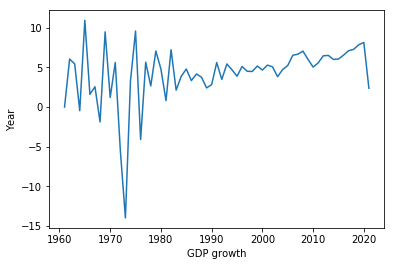

In [1005]:
plt.xlabel('GDP growth')
plt.plot(df1.Bangladesh)
plt.ylabel('Year')

In [1006]:
BD_Growth_Rate =df1['Bangladesh'].asfreq(pd.infer_freq(df1['Bangladesh'].index))

In [1007]:
start_date = datetime(2000,1,1)
end_date = datetime(2020,1,1)
BD_Growth = df1.Bangladesh[start_date:end_date]
BD_Growth

2000-12-31    5.293295
2001-12-31    5.077288
2002-12-31    3.833124
2003-12-31    4.739567
2004-12-31    5.239533
2005-12-31    6.535945
2006-12-31    6.671905
2007-12-31    7.058599
2008-12-31    6.013790
2009-12-31    5.045125
2010-12-31    5.571788
2011-12-31    6.464379
2012-12-31    6.521459
2013-12-31    6.013606
2014-12-31    6.061059
2015-12-31    6.552640
2016-12-31    7.113478
2017-12-31    7.284174
2018-12-31    7.863743
2019-12-31    8.152685
Freq: A-DEC, Name: Bangladesh, dtype: float64

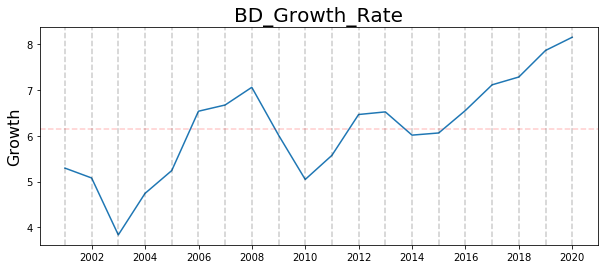

In [1008]:
plt.figure(figsize=(10,4))
plt.plot(BD_Growth)
plt.title('BD_Growth_Rate', fontsize=20)
plt.ylabel('Growth', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-12-31'), color='k', linestyle='--', alpha=0.2)
plt.axhline(BD_Growth.mean(), color='r', alpha=0.2, linestyle='--')
#time series is seasonal every 5 year tenure it produce V shape dip

In [1009]:
def adfuller_test(sales):
    result= adfuller(sales)
    labels = ["ADF Test Statistics","p-value","#Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [1010]:
adfuller_test(BD_Growth)

ADF Test Statistics : -1.9852286490792284
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
p-value : 0.2930871413613142
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
#Lags Used : 2
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Number of Observations Used : 17
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


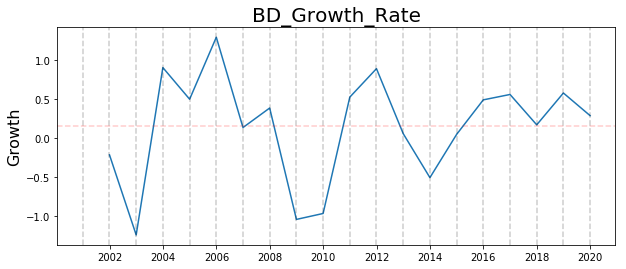

In [1011]:
first_diff = BD_Growth.diff()[1:]
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('BD_Growth_Rate', fontsize=20)
plt.ylabel('Growth', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-12-31'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')

In [1012]:
adfuller_test(first_diff)

ADF Test Statistics : -4.015827999054311
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
p-value : 0.0013298616611252603
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
#Lags Used : 2
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Number of Observations Used : 16
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<BarContainer object of 13 artists>

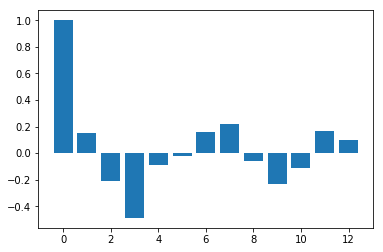

In [1013]:
acf_vals = acf(first_diff)
num_lags = 13
plt.bar(range(num_lags), acf_vals[:num_lags])

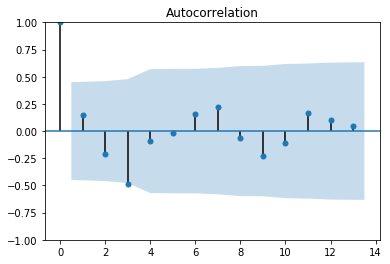

In [1014]:
pacf_plot = plot_acf(first_diff)

In [1015]:
train_end = datetime(2015,12,31)
test_end = datetime(2020,12,31)

train_data = BD_Growth[:train_end]
print(train_data)
test_data = BD_Growth[train_end+timedelta(days=1) :test_end]
print(test_data)

2000-12-31    5.293295
2001-12-31    5.077288
2002-12-31    3.833124
2003-12-31    4.739567
2004-12-31    5.239533
2005-12-31    6.535945
2006-12-31    6.671905
2007-12-31    7.058599
2008-12-31    6.013790
2009-12-31    5.045125
2010-12-31    5.571788
2011-12-31    6.464379
2012-12-31    6.521459
2013-12-31    6.013606
2014-12-31    6.061059
2015-12-31    6.552640
Freq: A-DEC, Name: Bangladesh, dtype: float64
2016-12-31    7.113478
2017-12-31    7.284174
2018-12-31    7.863743
2019-12-31    8.152685
Freq: A-DEC, Name: Bangladesh, dtype: float64


In [1016]:
my_order=(0,1,0)# My time series is seasonal thats why i am setting my normal AR,MA=0, and 1 differencing helped me get my time series stationary
my_seasonal_order=(1,0,0,3) # my time series is yearly and Pacf, Acf both has a significant lag at point 3 and seasonal lag of MA in (1,0,1,3 )is insignificant, so(1,0,0,3)
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [1017]:
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.05104660987854004


In [1018]:
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Bangladesh   No. Observations:                   16
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 3)   Log Likelihood                 -14.213
Date:                           Thu, 09 Dec 2021   AIC                             32.426
Time:                                   16:28:14   BIC                             33.842
Sample:                               12-31-2000   HQIC                            32.411
                                    - 12-31-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L3       -0.5690      0.242     -2.352      0.019      -1.043      -0.095
sigma2         0.3602      0.243      1.482

In [1019]:
predictions = model_fit.forecast(len(test_data))
print(predictions)
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions
print(test_data)

2016-12-31    6.841629
2017-12-31    6.814626
2018-12-31    6.534897
2019-12-31    6.370450
Freq: A-DEC, Name: predicted_mean, dtype: float64
2016-12-31    7.113478
2017-12-31    7.284174
2018-12-31    7.863743
2019-12-31    8.152685
Freq: A-DEC, Name: Bangladesh, dtype: float64


Text(0, 0.5, 'Error')

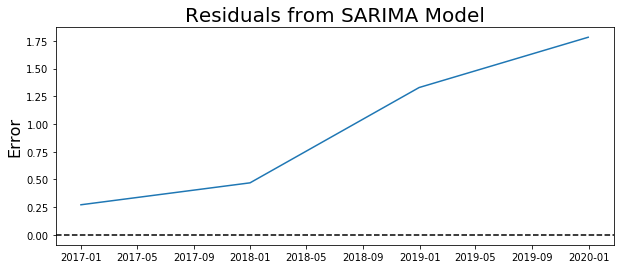

In [1020]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

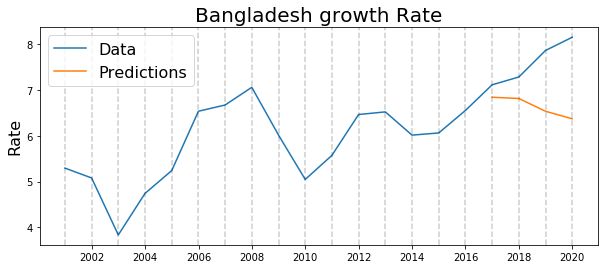

In [1021]:
plt.figure(figsize=(10,4))

plt.plot(BD_Growth)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Bangladesh growth Rate', fontsize=20)
plt.ylabel('Rate', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-12-31'), color='k', linestyle='--', alpha=0.2)

In [1022]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))


Mean Absolute Percent Error: 0.1226


In [1023]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.1441778185893077


In [1024]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = BD_Growth[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

In [1025]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

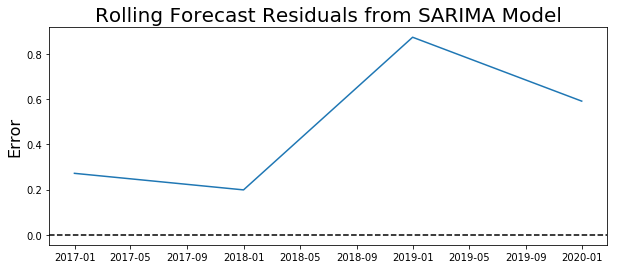

In [1026]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

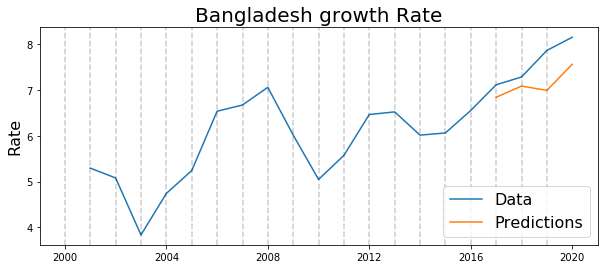

In [1027]:
plt.figure(figsize=(10,4))

plt.plot(BD_Growth)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Bangladesh growth Rate', fontsize=20)
plt.ylabel('Rate', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [1028]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0622


In [948]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))


Root Mean Squared Error: 0.5530436104100179


In [988]:
df1.Bangladesh.mean()

4.233603362147541

In [989]:
#4.2 far away from 0.553 prietty good model